In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from scripts import filepaths
import os
import tqdm

In [2]:
(mnist_X,_), (_, _) = mnist.load_data()

In [3]:
adni_vol_dir = os.path.join(filepaths.DATA_DIR,'train/vols')
adni_vols = [os.path.join(adni_vol_dir,i) for i in os.listdir(adni_vol_dir)] 

adni_X = np.empty((len(adni_vols),256,256))
for i,img in tqdm.tqdm(enumerate(adni_vols)):
    adni_X[i,...] = np.load(img)['vol_data']

4115it [00:09, 414.08it/s]


In [4]:
mnist_freq = np.real(np.fft.fft2(mnist_X,axes=(1,2)))
adni_freq = np.real(np.fft.fft2(adni_X,axes=(1,2)))

In [5]:
def get_corr_plot(data, ref_pix):
    n = data.shape[1]
    corr = np.empty((n,n))
    for i in range(n):
        for j in range(n):
            if(np.std(data[:,ref_pix[0],ref_pix[1]])==0 or np.std(data[:,i,j])==0):
                corr[i,j] = 0
            else:
                corr[i,j] = np.corrcoef(data[:,ref_pix[0],ref_pix[1]],data[:,i,j])[0,1]
    return corr

In [6]:
y_frac = 0.6
x_frac = 0.35

mnist_n = mnist_X.shape[1]
mnist_img_corr = get_corr_plot(mnist_X,(int(y_frac*mnist_n),int(x_frac*mnist_n)))
mnist_freq_corr = get_corr_plot(mnist_freq,(int(y_frac*mnist_n),int(x_frac*mnist_n)))

adni_n = adni_X.shape[1]
adni_img_corr = get_corr_plot(adni_X,(int(y_frac*adni_n),int(x_frac*adni_n)))
adni_freq_corr = get_corr_plot(adni_freq,(int(y_frac*adni_n),int(x_frac*adni_n)))

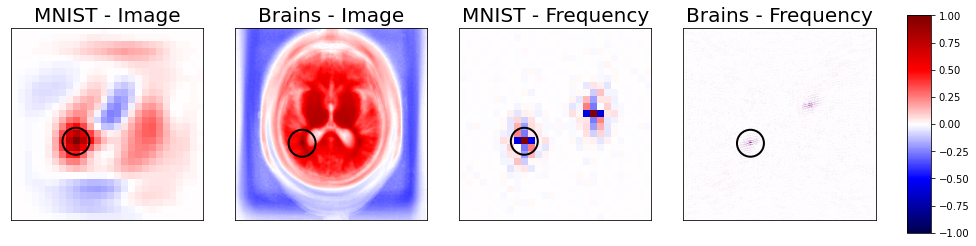

In [7]:
def plot_corr(corr_mat,ax,label,coords,radius):
    im = ax.imshow(corr_mat,cmap='seismic',vmin=-1,vmax=1)
    ax.set_title(label,fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
    circle = plt.Circle(coords, radius, color='black', fill=False, lw=2)

    ax.add_patch(circle)
    return im


fig,axs = plt.subplots(1,5,figsize=(16.5,4),gridspec_kw={'width_ratios': [4,4,4,4,0.5]})

rad_frac = 0.07
plot_corr(mnist_img_corr,axs[0],'MNIST - Image',(int(x_frac*mnist_n),int(y_frac*mnist_n)),rad_frac*mnist_n)
plot_corr(adni_img_corr,axs[1],'Brains - Image',(int(x_frac*adni_n),int(y_frac*adni_n)),rad_frac*adni_n)
plot_corr(mnist_freq_corr,axs[2],'MNIST - Frequency',(int(x_frac*mnist_n),int(y_frac*mnist_n)),rad_frac*mnist_n)
im = plot_corr(adni_freq_corr,axs[3],'Brains - Frequency',(int(x_frac*adni_n),int(y_frac*adni_n)),rad_frac*adni_n)

fig.colorbar(im,  cax=axs[4], use_gridspec=True)
plt.savefig('correlations.pdf',bbox_inches='tight')